# Approximate sine

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
import matplotlib.pyplot as plt

In [112]:
assert np.isclose(np.sin(np.pi / 6), 0.5)

In [141]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [142]:
class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = SineApproximator()

In [143]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [144]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [100/1000], Loss: 0.047893
Epoch [200/1000], Loss: 0.001285
Epoch [300/1000], Loss: 0.000153
Epoch [400/1000], Loss: 0.000305
Epoch [500/1000], Loss: 0.000131
Epoch [600/1000], Loss: 0.000053
Epoch [700/1000], Loss: 0.004173
Epoch [800/1000], Loss: 0.000048
Epoch [900/1000], Loss: 0.000041
Epoch [1000/1000], Loss: 0.000061


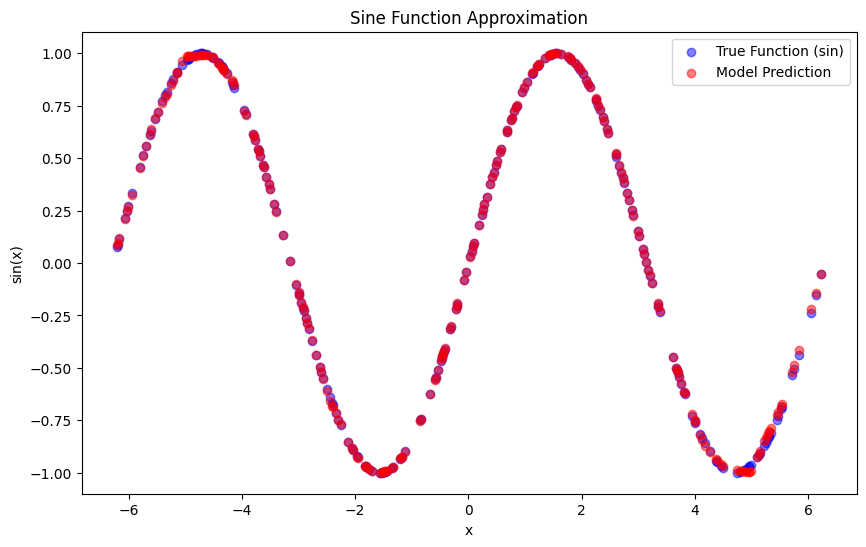

In [151]:
model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).numpy()


plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label='True Function (sin)', color='blue', alpha=0.5)
plt.scatter(x_test, predictions, label='Model Prediction', color='red', alpha=0.5)
plt.legend()
plt.title("Sine Function Approximation")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

---